In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import display, Latex, Markdown
from sklearn.model_selection import train_test_split

In [7]:
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
display(iris_frame)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [8]:
def KNN_predict(train_data, test_data, train_labels, n_classes, fitting_iterations, maximum_errors):
    gamma = np.zeros(len(train_labels))
    class_indices = [np.argwhere(train_labels == i).ravel() for i in range(n_classes)] #array of arrays of indices of elements of each class
    error_amount = 100500;
    iterations = 0
    
#     max_dist = 0
#     for j in range(len(train_data)) :
#         for cl_ind in range(len(class_indices)):     
#             for ind in range(len(class_indices[cl_ind])):
#                 if dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]]) > max_dist:
#                     max_dist = dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]])

    
    while(error_amount > maximum_errors) :
        error_amount = 0
        for j in range(len(train_data)) :
            classification_values = np.zeros(len(class_indices))
            for cl_ind in range(len(class_indices)):     
                for ind in range(len(class_indices[cl_ind])):
                    classification_values[cl_ind] += np.exp(-0.5 * dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]])) * gamma[class_indices[cl_ind][ind]]
#                     classification_values[cl_ind] += (15 / 16) * ((1 - dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]]) / max_dist) ** 2) * gamma[class_indices[cl_ind][ind]]
            guess = np.argmax(classification_values)
            if guess != train_labels[j] :
                gamma[j] += 1
                error_amount +=1
        iterations += 1
        print(error_amount)
    
    print("iterations = ", iterations, '\n')
    
    print("gamma = ", gamma, '\n')
    positive_gamma_indices = np.argwhere(gamma).ravel()
    gamma = gamma[positive_gamma_indices]
    train_labels = train_labels[positive_gamma_indices]
    train_data = train_data[positive_gamma_indices]
    class_indices = [np.argwhere(train_labels == i).ravel() for i in range(n_classes)]
    
    predictions = []
    for i in range(len(test_data)):
        cl_values = np.zeros(n_classes)
        for cl_ind in range(len(class_indices)):     
            for ind in range(len(class_indices[cl_ind])):
#                 print(cl_ind, ind, len(class_indices), len(class_indices[cl_ind]), i, len(test_data), len(gamma))
                cl_values[cl_ind] += np.exp(-0.5 * dist_sq(test_data[i], train_data[class_indices[cl_ind][ind]])) * gamma[class_indices[cl_ind][ind]]
            
        predictions.append(np.argmax(cl_values))
            
            
    return predictions


In [9]:
def dist_sq (a, b) :
    return ((a - b)**2).sum()

In [10]:
def gauss_kernel(a) :
    return np.exp(-0.5 * a)

In [11]:
class PotentialPredictor : 
    def __init__(self, Kernel, Distance):
        self.Kernel = Kernel
        self.Distance = Distance
    
    def Fit(self, train_data, train_labels, n_classes, maximum_errors):
        gamma = np.zeros(len(train_labels))
        class_indices = [np.argwhere(train_labels == i).ravel() for i in range(n_classes)] #array of arrays of indices of elements of each class
        error_amount = 100500;
        iterations = 0

    #     max_dist = 0
    #     for j in range(len(train_data)) :
    #         for cl_ind in range(len(class_indices)):     
    #             for ind in range(len(class_indices[cl_ind])):
    #                 if dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]]) > max_dist:
    #                     max_dist = dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]])


        while(error_amount > maximum_errors) :
            error_amount = 0
            for j in range(len(train_data)) :
                classification_values = np.zeros(len(class_indices))
                for cl_ind in range(len(class_indices)):     
                    for ind in range(len(class_indices[cl_ind])):
                        classification_values[cl_ind] += self.Kernel(self.Distance(train_data[j], train_data[class_indices[cl_ind][ind]])) * gamma[class_indices[cl_ind][ind]]
    #                     classification_values[cl_ind] += (15 / 16) * ((1 - dist_sq(train_data[j], train_data[class_indices[cl_ind][ind]]) / max_dist) ** 2) * gamma[class_indices[cl_ind][ind]]
                guess = np.argmax(classification_values)
                if guess != train_labels[j] :
                    gamma[j] += 1
                    error_amount +=1
            iterations += 1
            print(error_amount)

        print("iterations = ", iterations, '\n')

        print("gamma = ", gamma, '\n')
        positive_gamma_indices = np.argwhere(gamma).ravel()
        self.gamma = gamma[positive_gamma_indices]
        self.train_labels = train_labels[positive_gamma_indices]
        self.train_data = train_data[positive_gamma_indices]
        self.class_indices = [np.argwhere(self.train_labels == i).ravel() for i in range(n_classes)]

    def Predict(self, test_data, n_classes):
        predictions = []
        for i in range(len(test_data)):
            cl_values = np.zeros(n_classes)
            for cl_ind in range(len(self.class_indices)):     
                for ind in range(len(self.class_indices[cl_ind])):
#                     print(i, cl_ind, ind, self.class_indices[cl_ind][ind])
#                     print(len(self.train_data), len(self.gamma))
                    cl_values[cl_ind] += self.Kernel(self.Distance(test_data[i], self.train_data[self.class_indices[cl_ind][ind]])) * self.gamma[self.class_indices[cl_ind][ind]]
            predictions.append(np.argmax(cl_values))


        return np.array(predictions)

In [12]:
def inversdist_kernel(r) :
    if not (r == 0):
        return 1 / (r**2)
    else:
        return 100500

12
0
iterations =  2 

gamma =  [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 

[2 0 0 1 2 1 1 2 0 2 2 1 1 1 1 0 1 2 1 2 1 1 1 1 1 1 2 2 1 2 2 0 0 2 0 1 0
 2 0 1 1 2 0 0 0 2 1 0 0 2]
[2 0 0 1 2 1 2 2 0 2 2 2 1 1 1 0 1 2 1 2 1 1 2 1 1 2 2 2 1 2 2 0 0 2 0 1 0
 2 0 1 1 2 0 0 0 2 1 0 0 2]
[ True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
0.92


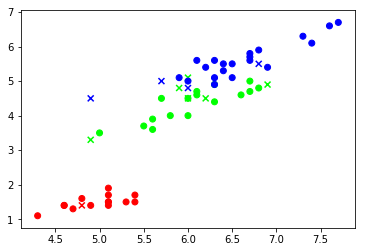

In [51]:
train_data, test_data, train_labels, test_labels = train_test_split(iris.data, iris.target, test_size=0.333)
# print(train_data, '\n')
# print(test_data, '\n')
# print(train_labels, '\n')
# print(test_labels, '\n')
predictor = PotentialPredictor(inversdist_kernel, dist_sq)
predictor.Fit(train_data, train_labels, 3, 0)
predictions = predictor.Predict(test_data, 3)
print(predictions)
print(test_labels)
check = predictions == test_labels
true_count = 0.
for i in range(len(check)):
    if check[i] == True:
        true_count += 1
print(check)
print(true_count / len(check))
plotx = [predictor.train_data[i][0] for i in range(len(predictor.train_data))]
ploty = [predictor.train_data[i][2] for i in range(len(predictor.train_data))]
plotc = []
for i in range(len(predictor.train_data)):
    if predictor.train_labels[i] == 0:
        plotc.append('#ff0000')
    elif predictor.train_labels[i] == 1:
        plotc.append('#00ff00')
    elif predictor.train_labels[i] == 2:
        plotc.append('#0000ff')
        
plt.scatter(plotx, ploty, c=plotc, marker='x')

plotx = [test_data[i][0] for i in range(len(test_data))]
ploty = [test_data[i][2] for i in range(len(test_data))]
plotc = []
for i in range(len(test_data)):
    if test_labels[i] == 0:
        plotc.append('#ff0000')
    elif test_labels[i] == 1:
        plotc.append('#00ff00')
    elif test_labels[i] == 2:
        plotc.append('#0000ff')
        
plt.scatter(plotx, ploty, c=plotc, marker='o')

In [54]:
wine = datasets.load_wine()
train_data, test_data, train_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.333)


45
8
0
iterations =  3 

gamma =  [1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.] 

[1 0 0 0 1 0 1 1 0 2 1 1 2 0 0 1 1 0 0 0 2 0 2 2 0 2 1 1 1 0 2 0 2 1 0 1 1
 2 2 1 0 0 1 1 2 1 2 0 1 1 0 2 2 1 2 0 1 0 2 1]
[1 0 0 0 1 0 1 1 0 1 1 2 1 0 0 1 1 0 0 0 2 2 0 1 0 1 1 1 1 0 2 2 1 1 0 2 2
 2 1 1 1 2 1 1 1 1 2 0 2 1 0 1 2 1 0 0 1 0 2 0]
[ True  True  True  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True False False False
  True False  True  True  True  True  True False False  True  True False
 False  True False  True False False  True  True False  True  True  True
 False  True  True False  True  True False  True  True  True  True

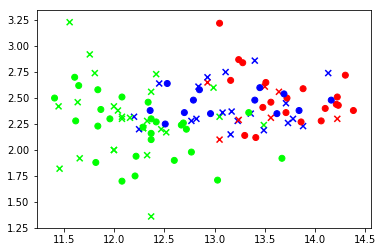

In [66]:
predictor = PotentialPredictor(gauss_kernel, dist_sq)
predictor.Fit(train_data, train_labels, 3, 0)
predictions = predictor.Predict(test_data, 3)
              
print(predictions)
print(test_labels)
check = predictions == test_labels
true_count = 0.
for i in range(len(check)):
    if check[i] == True:
        true_count += 1
print(check)
print(true_count / len(check))
plotx = [predictor.train_data[i][0] for i in range(len(predictor.train_data))]
ploty = [predictor.train_data[i][2] for i in range(len(predictor.train_data))]
plotc = []
for i in range(len(predictor.train_data)):
    if predictor.train_labels[i] == 0:
        plotc.append('#ff0000')
    elif predictor.train_labels[i] == 1:
        plotc.append('#00ff00')
    elif predictor.train_labels[i] == 2:
        plotc.append('#0000ff')
        
plt.scatter(plotx, ploty, c=plotc, marker='x')

plotx = [test_data[i][0] for i in range(len(test_data))]
ploty = [test_data[i][2] for i in range(len(test_data))]
plotc = []
for i in range(len(test_data)):
    if test_labels[i] == 0:
        plotc.append('#ff0000')
    elif test_labels[i] == 1:
        plotc.append('#00ff00')
    elif test_labels[i] == 2:
        plotc.append('#0000ff')
        
plt.scatter(plotx, ploty, c=plotc, marker='o')

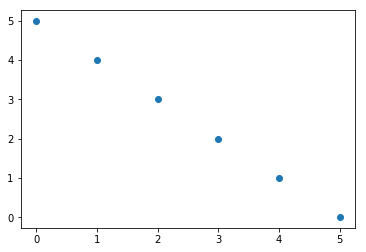

In [27]:
plt.scatter([0, 1, 2, 3, 4, 5], [5, 4, 3, 2, 1, 0])